In [ ]:
import pandas as pd

#import data
data = pd.read_csv(r'C:\Users\Purushotham\Desktop\deloitte\2021\machinelearning\datasets\breast-cancer-wisconsin.csv',header=None)

#set column names
data.columns = ['Sample Code Number','Clump Thickness','Uniformity of Cell Size',
                                                        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                                                        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
#view top 10 rows
data.head(10)

Clean the data

In [ ]:
import numpy as np
data = data.drop(['Sample Code Number'],axis=1) #Drop 1st column
data = data[data['Bare Nuclei'] != '?'] #Remove rows with missing data
data['Class'] = np.where(data['Class'] ==2,0,1) #Change the Class representation
data['Class'].value_counts() #Class distribution

Before building a classification model, let’s build a Dummy Classifier to determine the ‘baseline’ performance. This answers the question — ‘What would be the success rate of the model, if one were simply guessing?’ The dummy classifier we are using will simply predict the majority class.

In [ ]:
#Split data into attributes and class
X = data.drop(['Class'],axis=1)
y = data['Class']

#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

From the output, we can observe that there are 68 malignant and 103 benign cases in the test dataset. However, our classifier predicts all cases as benign (as it is the majority class).

### Evaluation Metrics

In [ ]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

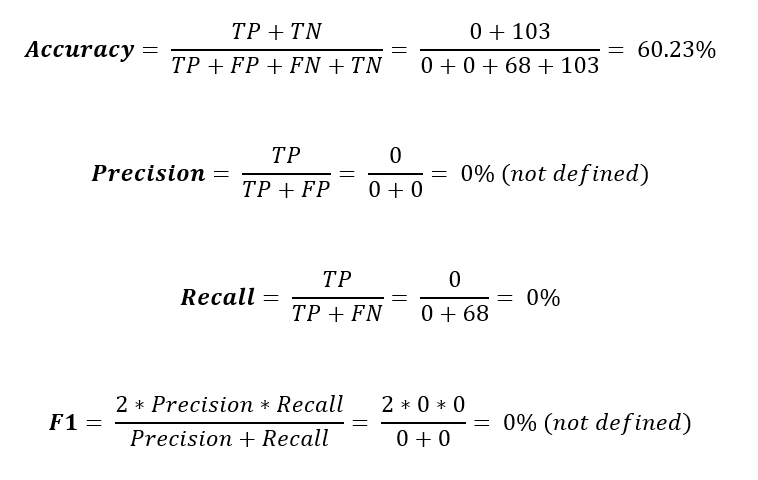

Now that we have the baseline accuracy, let’s build a Logistic regression model with default parameters and evaluate the model.

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Looking at the misclassified instances, we can observe that 8 malignant cases have been classified incorrectly as benign (False negatives). Also, just one benign case has been classified as malignant (False positive).

Let’s try to minimize the false negatives by using Grid Search to find the optimal parameters. Grid search can be used to improve any specific evaluation metric.
The metric we need to focus on to reduce false negatives is Recall.

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.0001, 0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

### Grid Search and RAndom Search

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let’s say we want to span the n_estimators hyperparameter from 5 to 100 with a step of 5 and the max_features hyperparameter from 0.1 to 1.0 with a step of 0.05. We are looking for the combination of these ranges that maximizes the average value of R2 in 5-fold cross-validation. Here’s the code that we need to write:

Now, let’s start with the grid search. Grid search is done using the GridSearchCV object of scikit-learn. It takes, as inputs, the estimator we are going to optimize, the number of folds in cross-validation and the scoring metric to consider when we look for the best combination of values of the hyperparameters. The last argument is a list of values we are going to explore for each hyperparameter. GridSearchCV will create all the combinations for us.

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_score_